## üìä Introduction to Instagram Analytics

> Instagram plays a crucial role in digital presence, offering powerful tools for:

- üíº **Business Promotion**  
- üé® **Portfolio Building**  
- üé• **Content Creation**  
- üß† **Personal Branding**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.linear_model import PassiveAggressiveRegressor

import plotly.io as pio
pio.renderers.default = 'notebook_connected'

#### üßπ Data Loading & Cleaning

> Initial step involving importing the dataset, handling missing values, and preparing data for analysis.


In [2]:
data = pd.read_csv("Instagram_reach_data.csv", encoding='latin1')

missing = data.isnull().sum()
dtypes = data.dtypes
summary = pd.DataFrame({
    'Missing Values': missing,
    'Data Type': dtypes
})
print(summary)


                Missing Values Data Type
Impressions                  0     int64
From Home                    0     int64
From Hashtags                0     int64
From Explore                 0     int64
From Other                   0     int64
Saves                        0     int64
Comments                     0     int64
Shares                       0     int64
Likes                        0     int64
Profile Visits               0     int64
Follows                      0     int64
Caption                      0    object
Hashtags                     0    object



---

## üîç Analyzing Components

---


In social media analytics, impressions refer to the total number of times a piece of content is displayed, regardless of whether it was clicked or engaged with. One user can contribute multiple impressions if they see the post multiple times.


---

#### üìä Distribution Plots of Impressions

> **Based on insights from the following Instagram sections:**

- üè† **Home**
- üè∑Ô∏è **Hashtag**
- üîç **Explore**

These plots visualize how impressions are distributed across each source, helping identify content reach patterns and potential outliers.

--- 


#### üè† Home Feed Reach


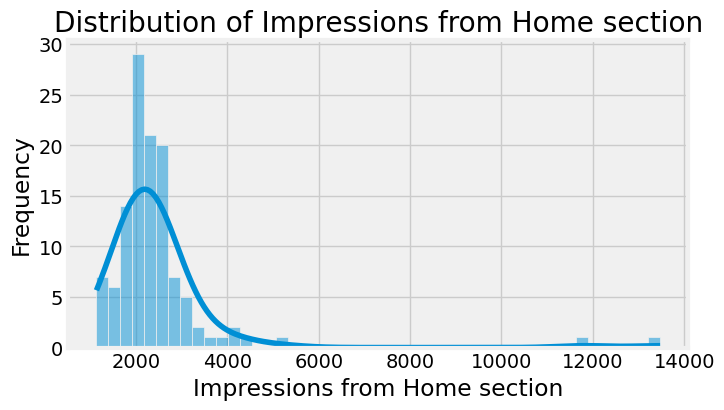

In [3]:
# impression plot for home section

plt.figure(figsize=(8, 4))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions from Home section")
sns.histplot(data['From Home'], kde=True)  # Adding kde=True for a smoother distribution curve
plt.xlabel("Impressions from Home section")  # Adding a label for the x-axis
plt.ylabel("Frequency")  # Adding a label for the y-axis
plt.show()

- üìä **Right-skewed distribution**
- üîº Peak around **2000 impressions**
- üìâ Majority ranges between **1500‚Äì3000**
- üöÄ A few viral posts reached up to **~13k**

#### üè∑Ô∏è Hashtag Performance


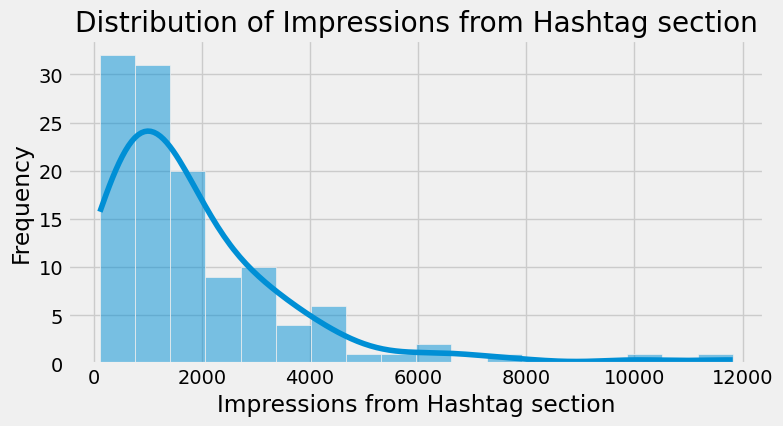

In [4]:
plt.figure(figsize=(8, 4))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions from Hashtag section")
sns.histplot(data['From Hashtags'], kde=True)  # Adding kde=True for a smoother distribution curve
plt.xlabel("Impressions from Hashtag section")  # Adding a label for the x-axis
plt.ylabel("Frequency")  # Adding a label for the y-axis
plt.show()

- üìä **Broader spread** than Home feed
- üîÑ Range: **500‚Äì3000 impressions**
- ü™Å Long tail extending to **~12k**
- ‚ö†Ô∏è **More volatile** and inconsistent performance
- Effective use of hashtags can lead to significant reach in some cases.

#### üîç Explore Section Impact


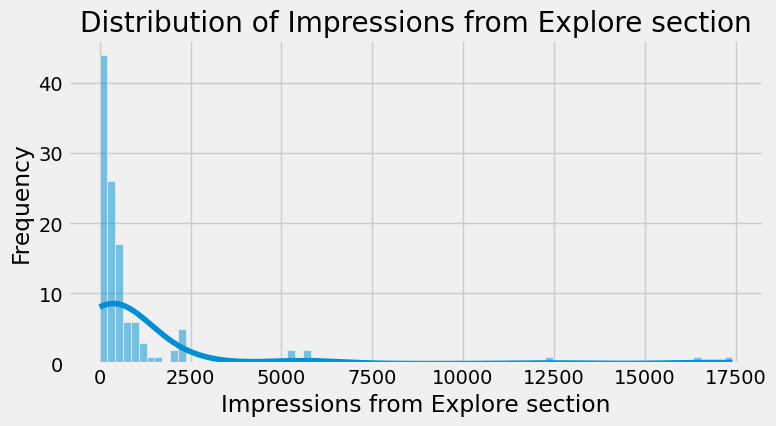

In [5]:
plt.figure(figsize=(8, 4))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions from Explore section")
sns.histplot(data['From Explore'], kde=True)  # Adding kde=True for a smoother distribution curve
plt.xlabel("Impressions from Explore section")  # Adding a label for the x-axis
plt.ylabel("Frequency")  # Adding a label for the y-axis
plt.show()

- üìä **Highly skewed distribution**
- üìâ Most posts below **1000 impressions**
- üí• Rare viral spikes up to **~17k**
- üé≤ **Least predictable** among all sources

### üìä Source Distribution Summary

In [6]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', 
             hole=0.3,width=600, height=400)  # Adjusted dimensions for better visibility
fig.show()


- üè† **Home Feed**: **44.1%** ‚Äî *Most consistent*  
- üè∑Ô∏è **Hashtags**: **33.6%** ‚Äî *Good potential*  
- üîç **Explore**: **19.2%** ‚Äî *Highest variance*  
- üìÅ **Others**: **3.05%** ‚Äî *Minimal impact*





#### üìê Comparative Insights

- ‚úÖ **Consistency**: `Home > Hashtag > Explore`  
- üöÄ **Potential for High Reach**: `Explore > Hashtag > Home`  
- üìà **Distribution Spread**:  
  - *Hashtag* ‚Äî most balanced  
  - *Explore* ‚Äî most dispersed  

---

#### üí° Strategic Insight

- üîÑ **Home**: Driven by regular engagement  
- üè∑Ô∏è **Hashtag**: Visibility improves with targeted usage  
- üîç **Explore**: Rare but impactful exposure when reached  



---

## üîç Analyzing Contents

---


#### ‚úçÔ∏è Caption Analysis  


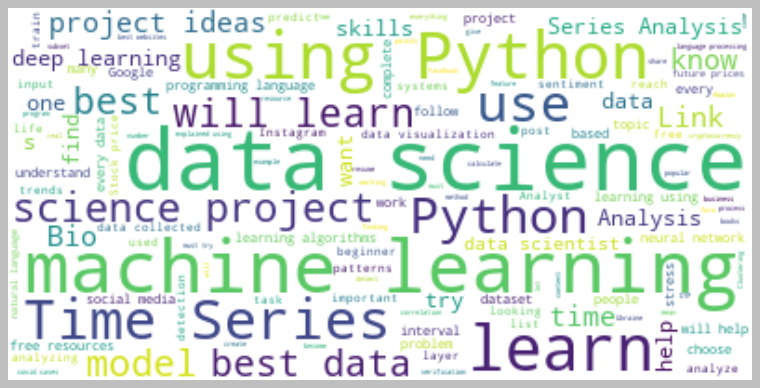

In [7]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- ‚òÅÔ∏è **Word cloud** reveals most frequent topics  
- üîç Key themes identified in content  
- üí° Strong focus on **data science** and **technology**

#### üè∑Ô∏è Hashtag Strategy  


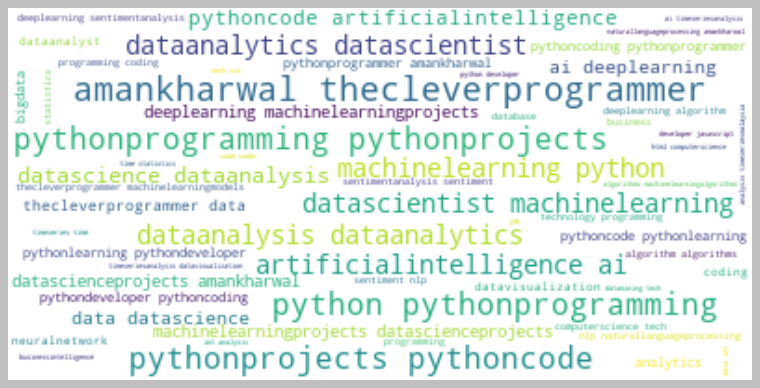

In [8]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- üìå Most **effective hashtags** highlighted  
- üìà Engagement **patterns identified**  
- üóÇÔ∏è Noted performance variations across **categories**


---

## üîç Analyzing relationships

---


#### ü´±üèº‚Äçü´≤üèº **Relationship between the variables and Impression**

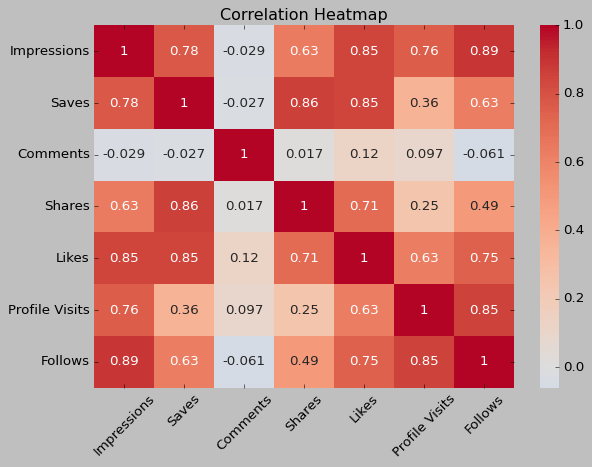

In [9]:
correlation = data.select_dtypes(include=['int64', 'int32', 'int']).drop(columns=['From Home','From Hashtags','From Explore','From Other']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- üíñ **Comments, Follows, Profile visits & Saves** ‚Äì *Strongest impact*  
- üîÅ **Shares** ‚Äì *Moderate influence*  
- üí¨ **Comments** ‚Äì *Limited & negetive effect*

#### üëç **Like‚ÄìReach Relationship**

In [10]:
figure = px.scatter(data_frame = data, x="Impressions",                    
                    height=400, width=600,
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

- üìà **Strong positive correlation**  
- üìä Clear **linear relationship**  
- üîº More **likes** lead to better **reach**

#### üí¨ **Comment Impact**

In [11]:
figure = px.scatter(data_frame = data, x="Impressions",                    
                    height=400, width=600,
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Impressions")
figure.show()

- üîª **Weak negative correlation**  
- üîµ **Bubble sizes** indicate frequency; most posts cluster under **10k impressions and 10 comments**  
- üìà **Outliers** with high impressions do **not** show proportional comment increase  
- üö´ Indicates **comments are not a strong driver** of reach  

#### üîÑ **Share Analysis**


In [12]:
figure = px.scatter(data_frame = data, x="Impressions",
                    height=400, width=600,
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

- ‚ûï **Moderate positive correlation**  
- üå± **Extends organic reach**  
- üöÄ Acts as a **virality indicator**

---

## üîç Analyzing conversion rate

---


#### üë§ **Profile Visit Conversion**  


In [13]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(f"Profile Visit to Follow Conversion Rate: {conversion_rate:.4f}%")

Profile Visit to Follow Conversion Rate: 41.0027%


- üîÅ **~41% conversion rate** (visits ‚Üí follows)  
- üìä **Above industry average**  
- ‚úÖ Strong indicator of **content quality**

#### üîó **Visit‚ÄìFollow Relationship**  


In [14]:
figure = px.scatter(data_frame = data, x="Profile Visits",
                    height=400, width=600,
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

- üìà **Linear correlation** observed  
- üîÑ Predictable **conversion pattern**  
- üå± Reflects **sustainable growth**

## üìå Key Findings



- **~45%** of reach comes from **followers**  
- **33.6%** of reach is driven by **hashtags**  
- A **linear relationship** exists between **likes** and **reach**  
- **Comments** do **not significantly** affect reach  
- The profile has an approx. **31% conversion rate** from **visits to follows**


#### üìä Analytical Insights Provided

- üîç **Content Performance**  
- üåê **Reach Distribution & Patterns**  
- ü§ù **Engagement Relationships**  
- üéØ **Follower Conversion Efficiency**



#### üöÄ Growth Opportunities

- üìà **Optimize Explore Section Reach**  
- üè∑Ô∏è **Diversify and Test Hashtag Strategies**  
- ‚è∞ **Refine Posting Times for Maximum Reach**  
- üìä **Analyze Engagement Behavior More Deeply**